In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# **Dataset 1: Software Engineer Salaries**

In [2]:
#Carga del dataset
df1 = pd.read_csv('/content/Software Engineer Salaries.csv')
#descargarlo desde https://www.kaggle.com/datasets/emreksz/software-engineer-jobs-and-salaries-2024

In [3]:
#revision del dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB
None


In [4]:
print(df1.describe())

       Company Score
count     789.000000
mean        3.895311
std         0.524952
min         1.000000
25%         3.600000
50%         3.900000
75%         4.200000
max         5.000000


In [5]:
df1.head(20)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


<ipython-input-6-02b25411849c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-6-02b25411849c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


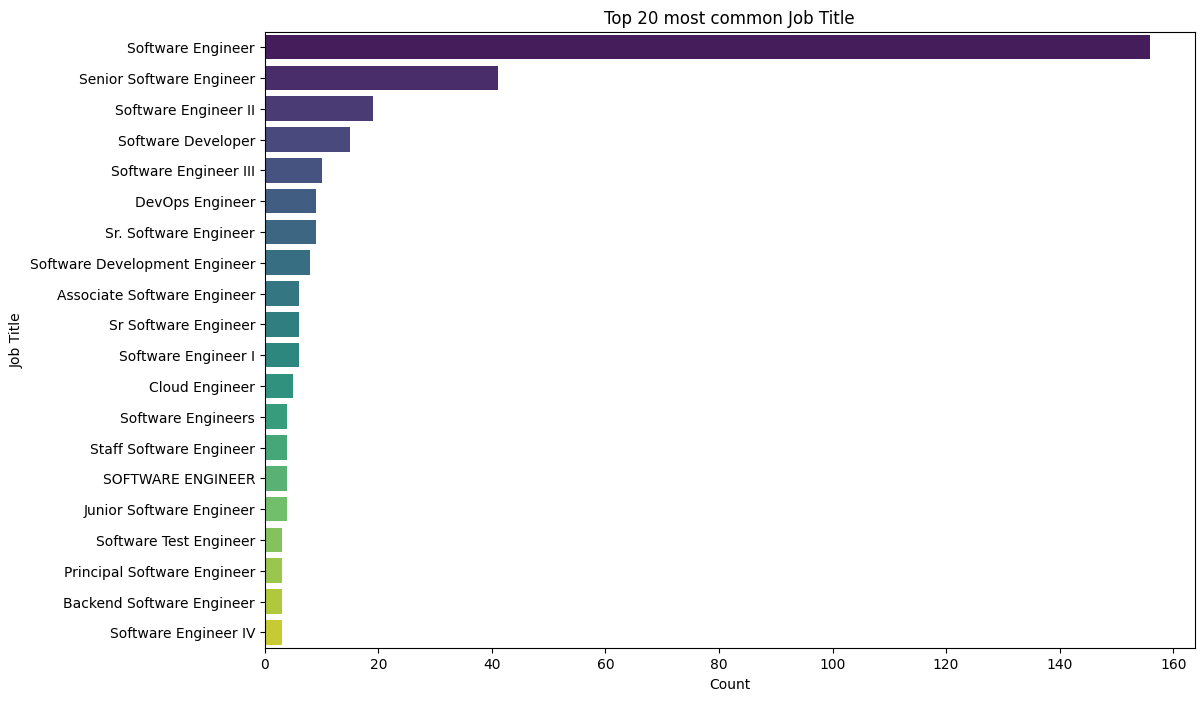

<ipython-input-6-02b25411849c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-6-02b25411849c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


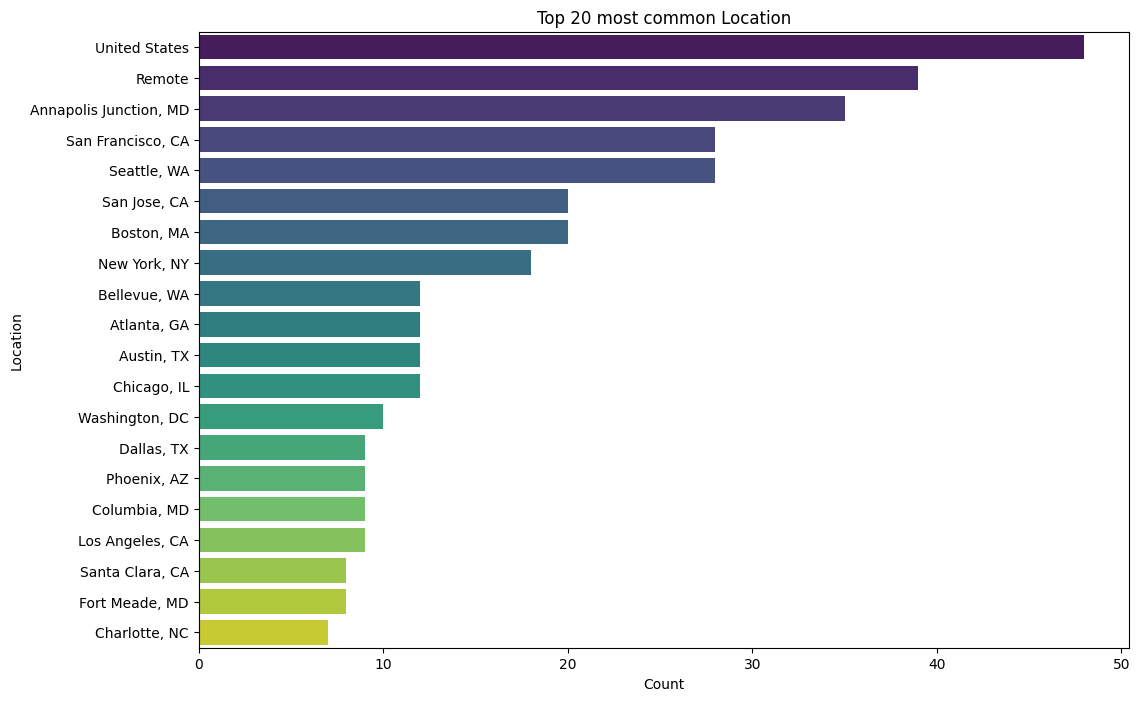

In [6]:
def plot_top_n_categories(df1, column, n=20):
    top_n = df1[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = ['Job Title', 'Location']
for col in categorical_columns:
    plot_top_n_categories(df1, col, n=20)



1.   Requiere mas limpieza para obtener salario minimo, maximo, promedio
2.   Capaz con algun scraper se logre obtener la industria y tipo de empresa



# **Dataset 2: Data Science Job listing**

In [7]:
#Carga del dataset
df2 = pd.read_csv(r'/content/Data-Science-Job_Listing.csv')
#descargarlo desde https://www.kaggle.com/datasets/ritiksharma07/data-science-job-listings-from-glassdoor

In [8]:
#revision del dataset
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB
None


In [9]:
print(df2.describe())

         Position  Company Rating
count  500.000000      439.000000
mean   250.500000        3.812301
std    144.481833        0.480281
min      1.000000        1.000000
25%    125.750000        3.600000
50%    250.500000        3.800000
75%    375.250000        4.000000
max    500.000000        5.000000


In [10]:
df2.head(20)

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6
5,6,IT Manager,Western Welding Academy,"Gillette, WY",$90K (Employer est.),26d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
6,7,"Data Center Services Technician - IT, Crypto M...",Growler Mining,"Tuscaloosa, AL",$22.00 - $28.00 Per Hour (Employer est.),30d+,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
7,8,Data Center Construction Coordinator,Applied Digital,"Ellendale, ND",$58K - $80K (Employer est.),23d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
8,9,Senior AIOps Engineer,Health Data Analytics Institute\n4.4,"Dedham, MA",$151K - $175K (Employer est.),30d+,https://media.glassdoor.com/sql/3037378/health...,https://www.glassdoor.com/partner/jobListing.h...,4.4
9,10,Software Measurement and Estimation Analyst,Carnegie Mellon University Software Engineerin...,"Pittsburgh, PA",NaN,11d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN


<ipython-input-11-1cf1ea52f335>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-11-1cf1ea52f335>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


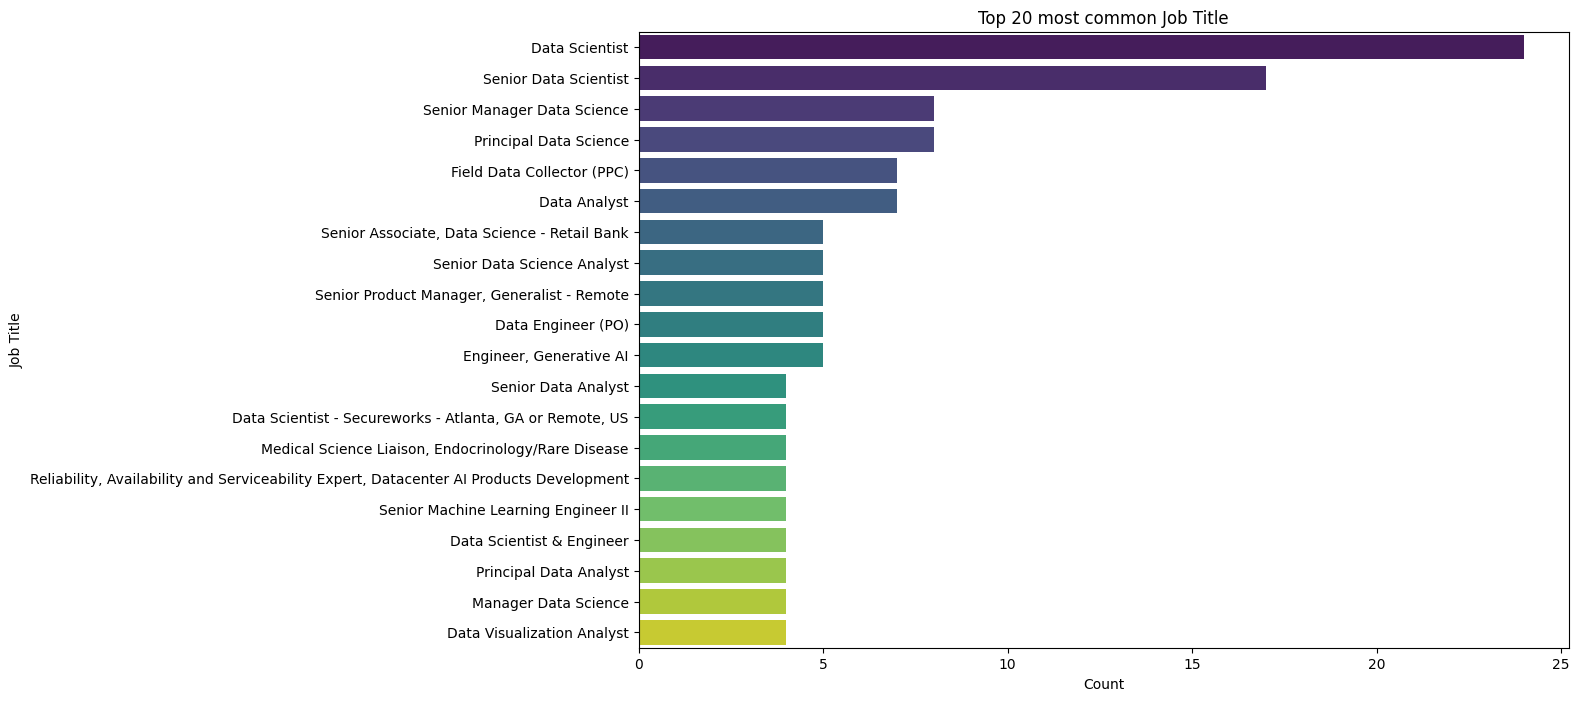

<ipython-input-11-1cf1ea52f335>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-11-1cf1ea52f335>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


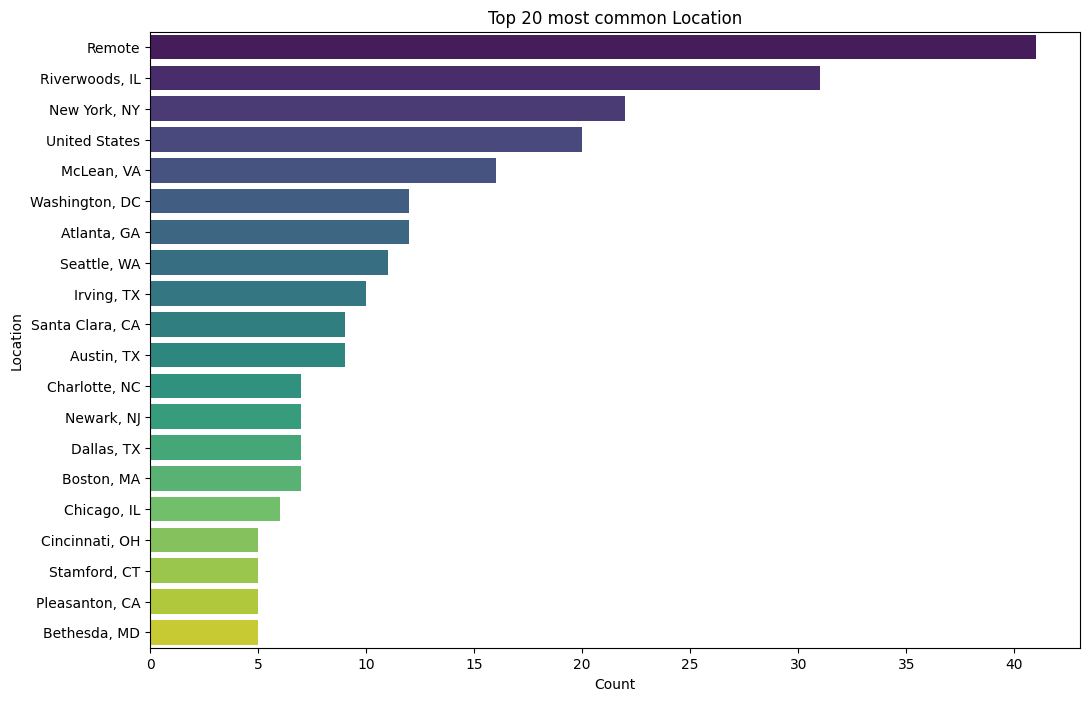

In [11]:
def plot_top_n_categories(df2, column, n=20):
    top_n = df2[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = ['Job Title', 'Location']
for col in categorical_columns:
    plot_top_n_categories(df2, col, n=20)



1. Requiere mas limpieza para obtener salario minimo, maximo, promedio
2. Capaz con algun scraper se logre obtener la industria y tipo de empresa.
3. En el nombre de la empresa aparece el rating


# **Dataset 3: Glassdoor Salary Cleaned Version**

In [12]:
#Carga del dataset
df3 = pd.read_csv('/content/Glassdoor_Salary_Cleaned_Version.csv')
#descargarlo desde https://www.kaggle.com/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor/data

In [13]:
#revision del dataset
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [14]:
print(df3.describe())

           Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.068733   
std      0.801210   497.183763    0.177034           0.149721   31.869282   
min     -1.000000    -1.000000    0.000000           0.000000   10.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   127.183288  100.626011    0.557951   46.591644    0.528302    0.002695   
std     46.909006   38.855948    0.496965   53.778815    0.4995

In [15]:
df3.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\n,MD,1,12,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\n,CA,0,15,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\n,NY,1,6,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\n,NY,1,11,1,0,1,0,0


<ipython-input-16-9c842f0191ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-16-9c842f0191ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


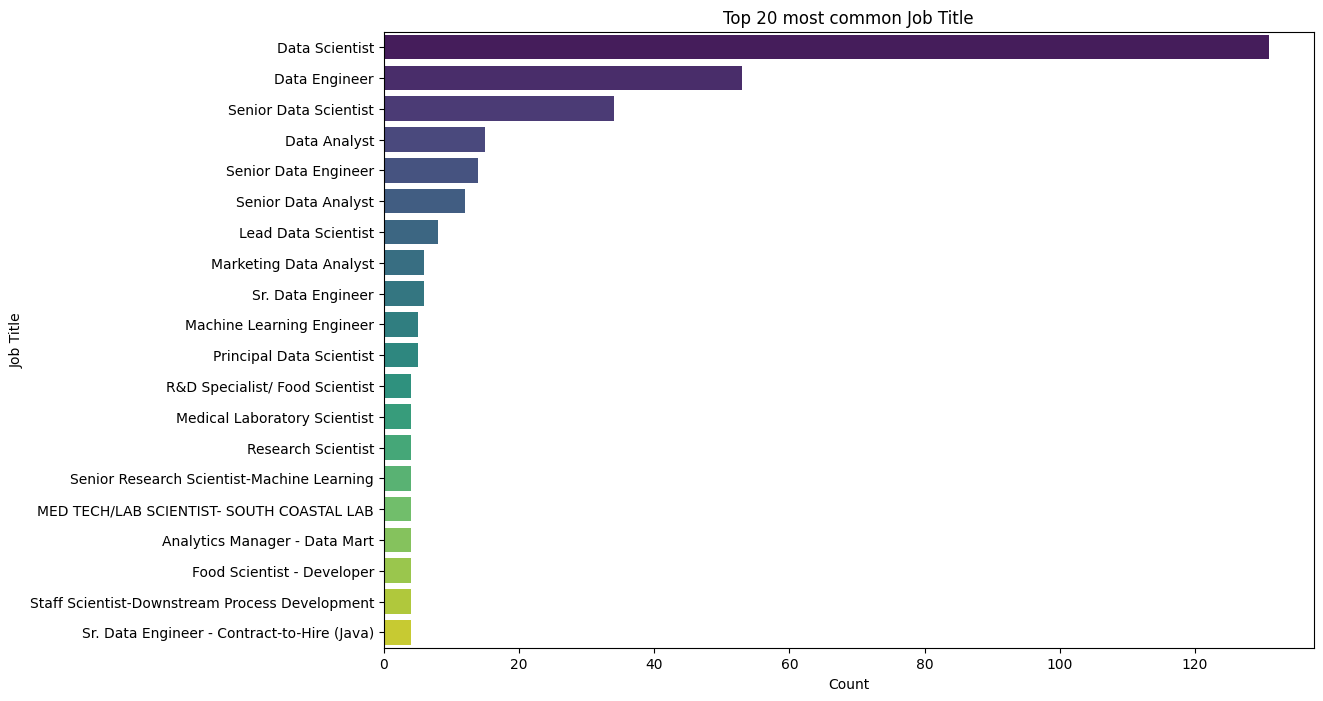

<ipython-input-16-9c842f0191ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-16-9c842f0191ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


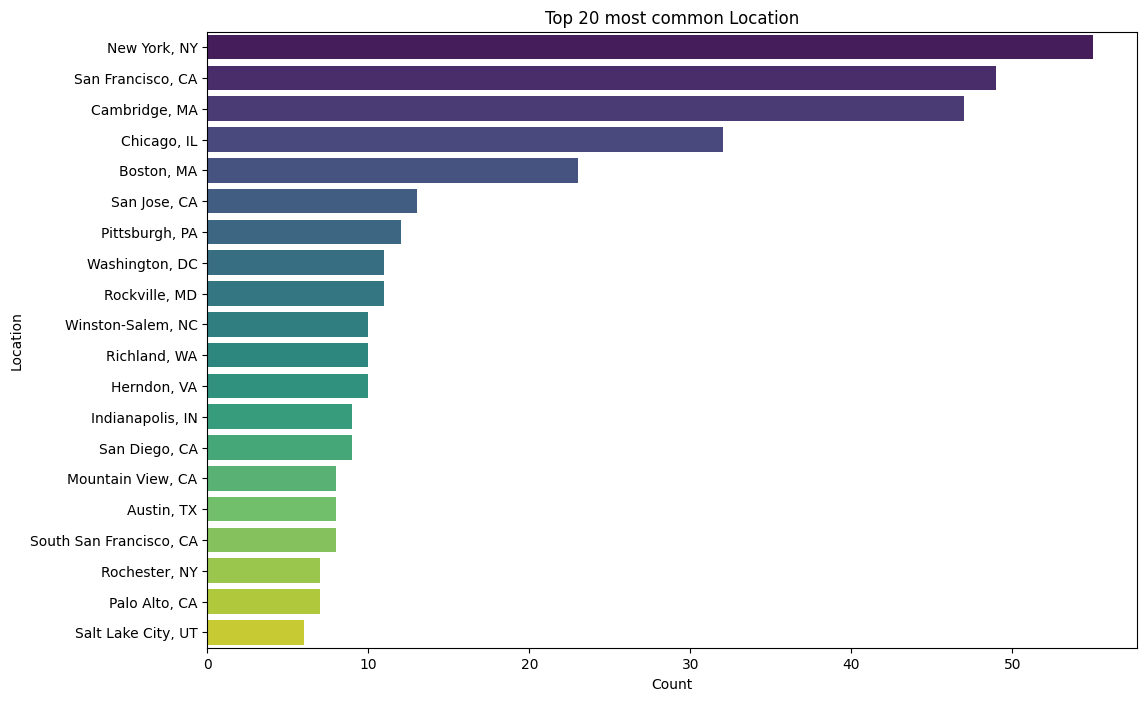

<ipython-input-16-9c842f0191ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-16-9c842f0191ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


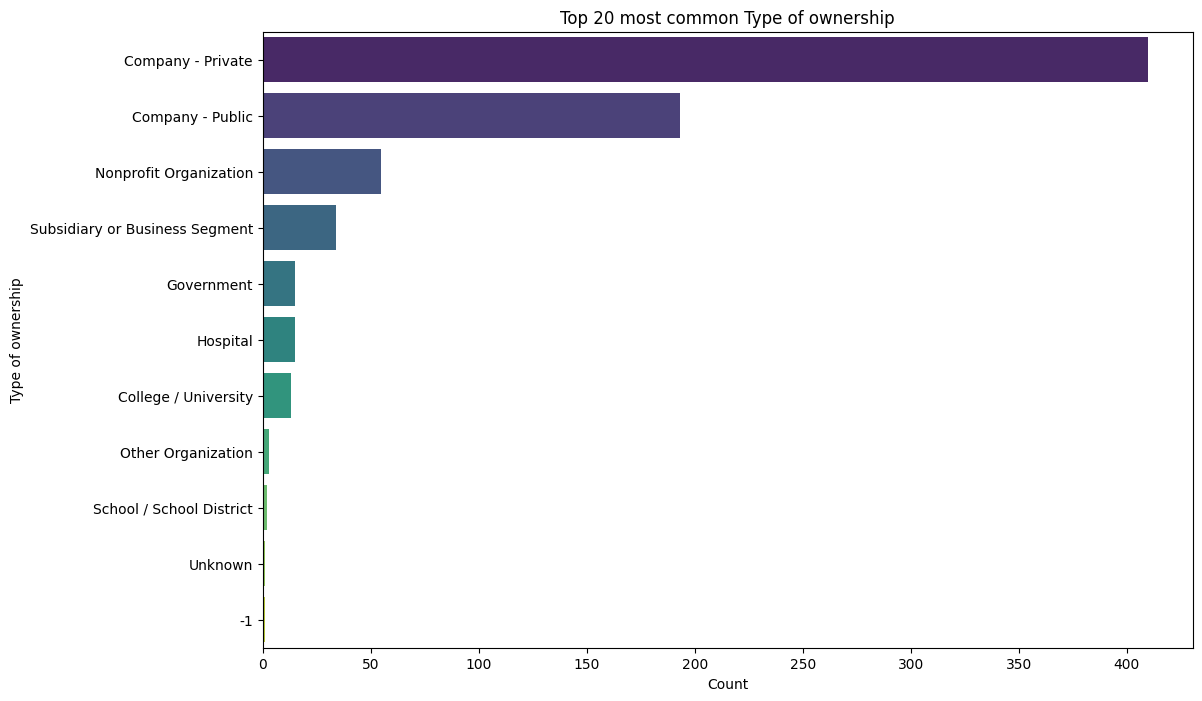

<ipython-input-16-9c842f0191ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-16-9c842f0191ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


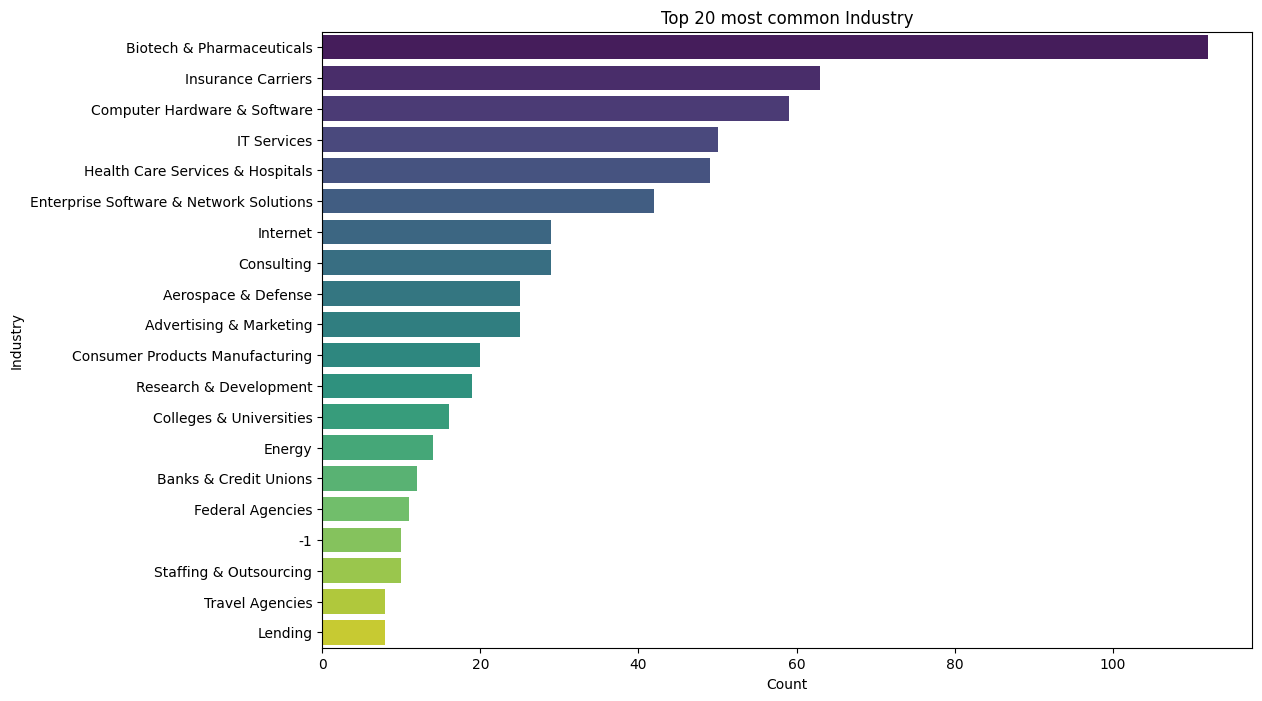

<ipython-input-16-9c842f0191ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-16-9c842f0191ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


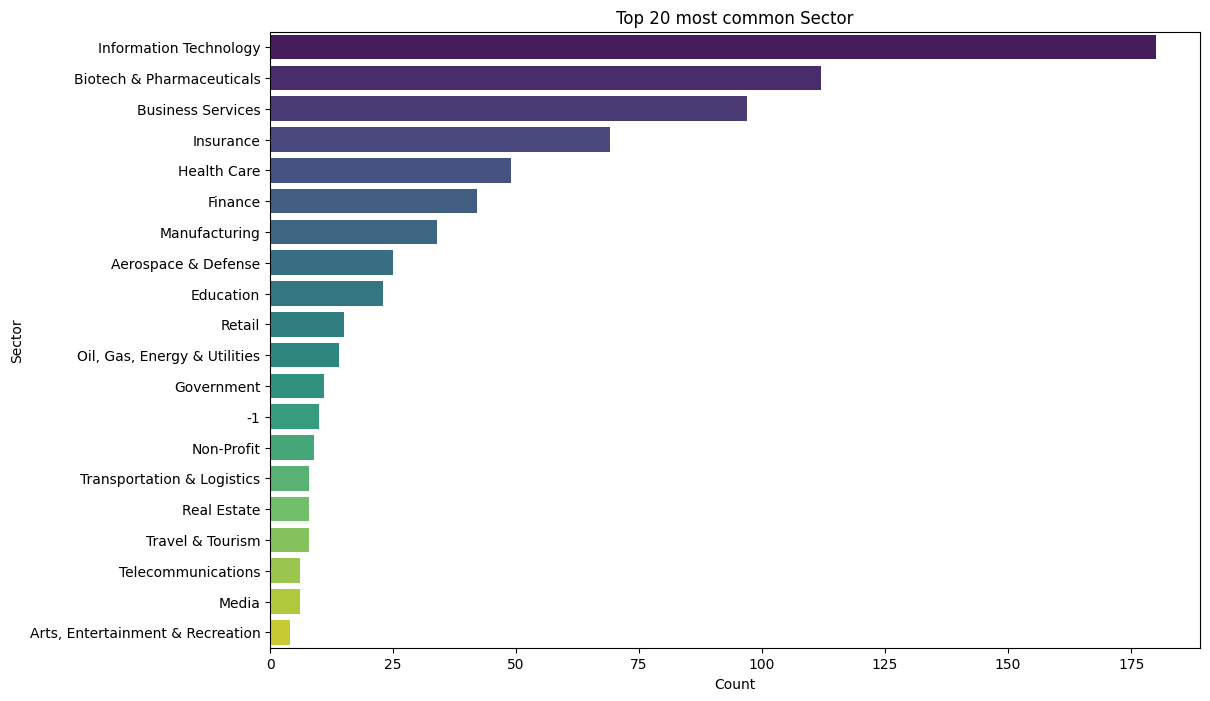

In [16]:
def plot_top_n_categories(df3, column, n=20):
    top_n = df3[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = ['Job Title', 'Location', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df3, col, n=20)

# **Dataset 4: Cost of living US**

In [17]:
#Carga del dataset
df4 = pd.read_csv('/content/cost_of_living_us.csv')
#descargarlo desde https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties?resource=download

In [18]:
#revision del dataset
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [19]:
print(df4.describe())

            case_id  housing_cost     food_cost  transportation_cost  \
count  31430.000000  31430.000000  31430.000000         31430.000000   
mean    1589.311804  11073.673539   8287.504557         13593.856381   
std      917.218414   4165.606147   3271.140249          1640.456562   
min        1.000000   4209.311280   2220.276840          2216.461440   
25%      792.000000   8580.000000   5801.424360         12535.159800   
50%     1593.000000  10416.000000   8129.156280         13698.164400   
75%     2386.000000  12444.000000  10703.624280         14765.758500   
max     3171.000000  61735.587600  31178.619600         19816.482000   

       healthcare_cost  other_necessities_cost  childcare_cost         taxes  \
count     31430.000000            31430.000000    31430.000000  31430.000000   
mean      13394.031748             7015.318377     9879.584233   7657.714782   
std        5204.545710             2397.415490     6778.223399   3339.795571   
min        3476.379960         

In [20]:
df4.head(20)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,5983.78524,0.0000,8236.73076,55071.6684,73010.414062
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,7228.96944,6147.8298,9459.90240,70773.6744,73010.414062
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,7990.14840,15824.6940,11168.75028,89077.8696,73010.414062
8,1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.15040,12189.77040,14994.60000,20241.18720,9945.10176,18802.1892,13210.14840,104640.1524,73010.414062
9,1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.15040,14917.35840,15064.26360,23163.26520,10933.41504,18802.1892,13417.21920,111554.8596,73010.414062
